### How to read in data using PyTorch

#### Read in data from files

In [4]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


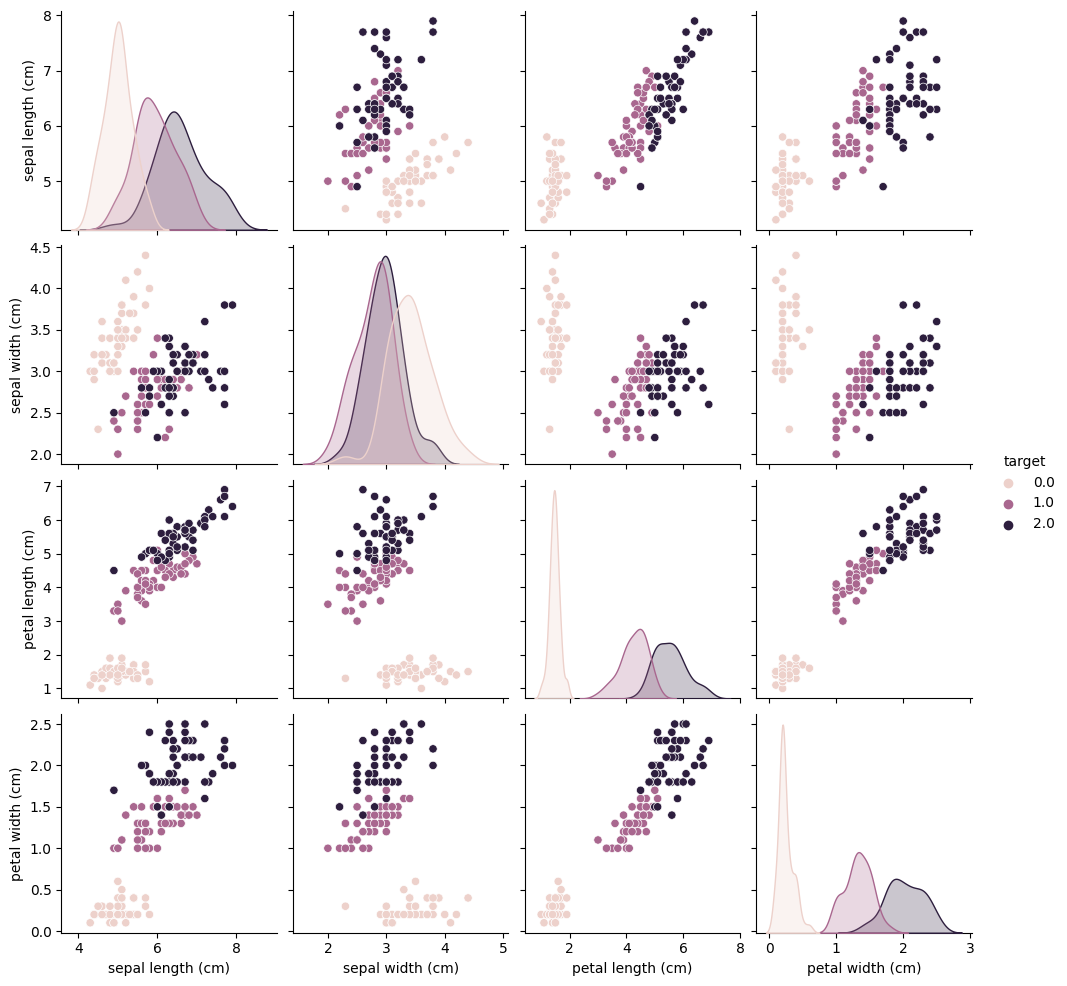

In [7]:
sns.pairplot(df, hue='target')

In [ ]:
# Build train/test split tensors

# 1) sklearn method
from sklearn.model_selection import train_test_split
target = 'target'
feats = [el for el in df.columns if el != target]
X = df[feats].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_test)
y_train, y_test = torch.LongTensor(y_train), torch.LongTensor(y_test)

In [11]:
# 2) pytorch method
from torch.utils.data import TensorDataset, DataLoader
target_col = 'target'
feat_cols = [el for el in df.columns if el != target]
feats = df[feat_cols].values
target = df[target_col].values

iris = TensorDataset(torch.FloatTensor(feats), torch.LongTensor(target))
type(iris)

torch.utils.data.dataset.TensorDataset

In [12]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [14]:
# Now use DataLoader to shuffle data/enable us to produce batches later on. This helps with very large datasets, as we can pass data through in batches until we go over entire dataset once, getting us to one epoch.
iris_loader = DataLoader(iris, batch_size=50, shuffle=True)
for i_batch,sample_batch in enumerate(iris_loader):
    print('i_batch: ', i_batch, '\n', 'sample_batch: \n', sample_batch)

i_batch:  0 
 sample_batch: 
 [tensor([[7.3000, 2.9000, 6.3000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.7000, 2.5000, 5.0000, 2.0000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.7000, 2.8000, 4.1000, 1.3000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [6.4000, 3.2000, 5.3000, 2.3000],
   